***Vorlesung 'Syntax natürlicher Sprachen'***

---
# Vorlesung 12: Grammar Induction

https://www.nltk.org/book/ch08-extras.html#grammar-induction

In [1]:
import nltk

---

## 1. Einführung: Induktion von PCFG-Regeln aus wenigen Bäumen

### 1.1 Daten: Bäume in der Penn-Treebank

In [2]:
for tree in nltk.corpus.treebank.parsed_sents('wsj_0001.mrg'):
    print(tree)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


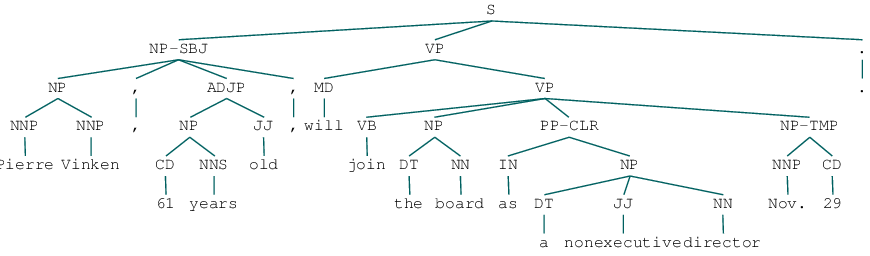

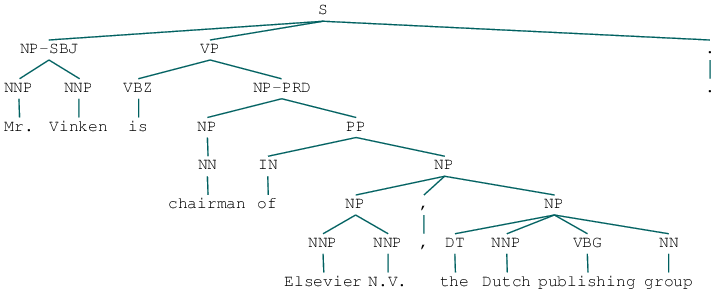

In [3]:
for tree in nltk.corpus.treebank.parsed_sents('wsj_0001.mrg'):
    display(tree)
    #tree.pretty_print(unicodelines=True)

---
### 1.2 Grammar Induction (`nltk.induce_pcfg`)

In [4]:
productions = []
S = nltk.Nonterminal('S')
for tree in nltk.corpus.treebank.parsed_sents('wsj_0001.mrg'):
    productions += tree.productions()

In [5]:
grammar = nltk.induce_pcfg(S, productions)

print(len(grammar.productions()))
for production in grammar.productions():
    print(production)

44
S -> NP-SBJ VP . [1.0]
NP-SBJ -> NP , ADJP , [0.5]
NP -> NNP NNP [0.25]
NNP -> 'Pierre' [0.125]
NNP -> 'Vinken' [0.25]
, -> ',' [1.0]
ADJP -> NP JJ [1.0]
NP -> CD NNS [0.125]
CD -> '61' [0.5]
NNS -> 'years' [1.0]
JJ -> 'old' [0.5]
VP -> MD VP [0.333333]
MD -> 'will' [1.0]
VP -> VB NP PP-CLR NP-TMP [0.333333]
VB -> 'join' [1.0]
NP -> DT NN [0.125]
DT -> 'the' [0.666667]
NN -> 'board' [0.25]
PP-CLR -> IN NP [1.0]
IN -> 'as' [0.5]
NP -> DT JJ NN [0.125]
DT -> 'a' [0.333333]
JJ -> 'nonexecutive' [0.5]
NN -> 'director' [0.25]
NP-TMP -> NNP CD [1.0]
NNP -> 'Nov.' [0.125]
CD -> '29' [0.5]
. -> '.' [1.0]
NP-SBJ -> NNP NNP [0.5]
NNP -> 'Mr.' [0.125]
VP -> VBZ NP-PRD [0.333333]
VBZ -> 'is' [1.0]
NP-PRD -> NP PP [1.0]
NP -> NN [0.125]
NN -> 'chairman' [0.25]
PP -> IN NP [1.0]
IN -> 'of' [0.5]
NP -> NP , NP [0.125]
NNP -> 'Elsevier' [0.125]
NNP -> 'N.V.' [0.125]
NP -> DT NNP VBG NN [0.125]
NNP -> 'Dutch' [0.125]
VBG -> 'publishing' [1.0]
NN -> 'group' [0.25]


### 1.3 Beispiel-Parse mit induzierter Grammatik

(S
  (NP-SBJ (NNP Mr.) (NNP Pierre))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (DT the) (NN director))
      (PP (IN of) (NP (NNP Elsevier) (NNP N.V.)))))
  (. .)) (p=1.05964e-07)


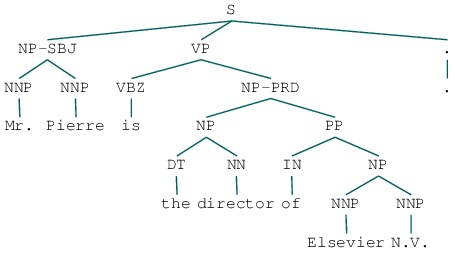

In [6]:
parser = nltk.ViterbiParser(grammar)
sent = "Mr. Pierre is the director of Elsevier N.V. .".split()
for tree in parser.parse(sent):
    print(tree)
    display(tree)
    #tree.pretty_print(unicodelines=True)

---
### 1.4 Normalisierung 

##### Tree Transformations
https://www.nltk.org/book/ch08-extras.html#normal-forms

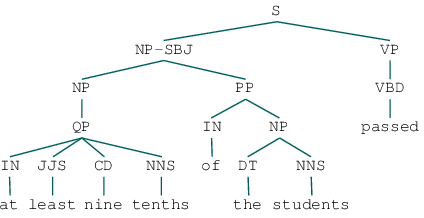

In [7]:
from nltk import Tree
treebank_string = """(S (NP-SBJ (NP (QP (IN at) (JJS least) (CD nine) (NNS tenths)) ) (PP (IN of) (NP (DT the) (NNS students) ))) (VP (VBD passed)))"""
t = nltk.Tree.fromstring(treebank_string)
t

#### 1.4.1 Collapse Unary:

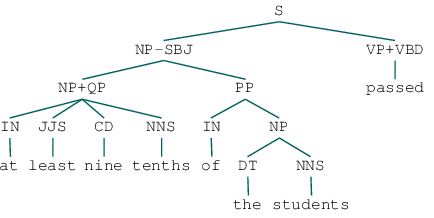

In [8]:
import copy
t1 = copy.deepcopy(t)
t1.collapse_unary(collapsePOS=True, collapseRoot=True)
t1

#### 1.4.2 Chomsky Normal Form:

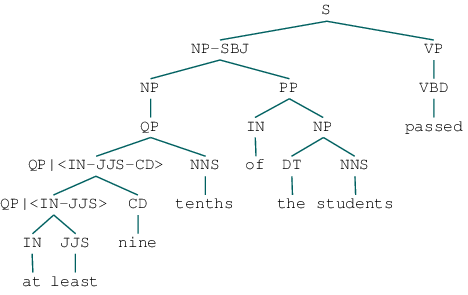

In [9]:
t3 = copy.deepcopy(t)
t3.chomsky_normal_form(factor='left')
t3

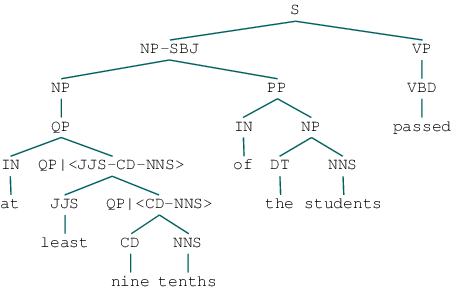

In [10]:
t2 = copy.deepcopy(t)
t2.chomsky_normal_form(factor='right')
t2

---
### 1.5 Parent Annotation


#### 1.5.1 Chomsky Normal Form with Parent Annotation (`vertMarkov=1`):

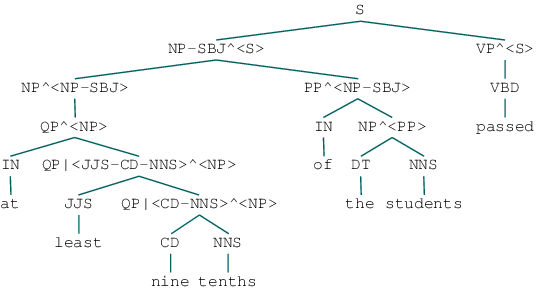

In [11]:
t2 = copy.deepcopy(t)
t2.chomsky_normal_form(vertMarkov=1) #childChar='|', parentChar='^'
t2

#### 1.5.2 Chomsky Normal Form with Grandparent Annotation (`vertMarkov=2`):

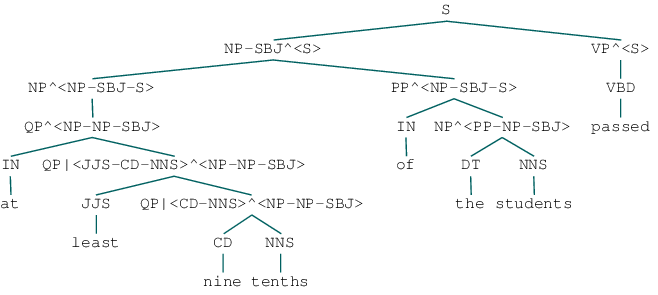

In [12]:
t2 = copy.deepcopy(t)
t2.chomsky_normal_form(vertMarkov=2) 
t2

---
## 2. Induktion von PCFG-Regeln aus dem 10%-Penn-Treebank-Sample des NLTK

### 2.1 Daten: Penn-Treebank-Sample

In [13]:
from nltk.corpus import treebank

---
### 2.2 Grammar Induction (`nltk.induce_pcfg`)

In [14]:
productions = []
S = nltk.Nonterminal('S')
for tree in treebank.parsed_sents():
    productions += tree.productions()
    
grammar = nltk.induce_pcfg(S, productions)

len(grammar.productions())

21763

In [15]:
grammar.productions()[0:9]

[S -> NP-SBJ VP . [0.162428],
 NP-SBJ -> NP , ADJP , [0.000392567],
 NP -> NNP NNP [0.0309391],
 NNP -> 'Pierre' [0.00010627],
 NNP -> 'Vinken' [0.00021254],
 , -> ',' [0.999795],
 ADJP -> NP JJ [0.014556],
 NP -> CD NNS [0.0110015],
 CD -> '61' [0.00141004]]

---
### 2.3 Parsen mit induzierter PCFG-Grammatik (Viterbi-Parser)

#### VIterbi-Parser = probabilistischer Parser (berücksichtigt Wahrscheinlichkeitsinformationen der Regeln)

#### nicht-probabilistischer Parser (z.B. Chart-Parser): lange Laufzeit wegen hoher Regelanzahl (s.o.)

In [16]:
parser = nltk.ViterbiParser(grammar)
sent = "I shot an elephant in my suit".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-SBJ (PRP I))
  (VP
    (VBD shot)
    (NP (DT an) (NN elephant))
    (PP-CLR (IN in) (NP (PRP$ my) (NN suit))))) (p=1.29805e-23)
        S                                       
  ┌─────┴──────────────┐                         
  │                    VP                       
  │     ┌────────┬─────┴───────────┐             
  │     │        │               PP-CLR         
  │     │        │            ┌────┴─────┐       
NP-SBJ  │        NP           │          NP     
  │     │    ┌───┴─────┐      │    ┌─────┴───┐   
 PRP   VBD   DT        NN     IN  PRP$       NN 
  │     │    │         │      │    │         │   
  I    shot  an     elephant  in   my       suit



In [17]:
parser = nltk.ViterbiParser(grammar)
sent = "the problem he faced was hard".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-TMP (DT the) (NN problem))
  (NP-SBJ-3 (PRP he))
  (VP (VBN faced) (VP (VBD was) (ADJP-PRD (JJ hard))))) (p=6.18592e-22)
                      S                           
      ┌───────────────┼────────────┐               
      │               │            VP             
      │               │       ┌────┴───┐           
      │               │       │        VP         
      │               │       │    ┌───┴─────┐     
    NP-TMP         NP-SBJ-3   │    │      ADJP-PRD
 ┌────┴───────┐       │       │    │         │     
 DT           NN     PRP     VBN  VBD        JJ   
 │            │       │       │    │         │     
the        problem    he    faced was       hard  



In [18]:
parser = nltk.ViterbiParser(grammar)
sent = "at least nine tenth of the students passed".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-SBJ
    (NP (QP (IN at) (JJS least) (CD nine)) (NN tenth))
    (PP (IN of) (NP (DT the) (NNS students))))
  (VP (VBD passed))) (p=1.65588e-26)
                           S                         
                     ┌─────┴─────────────────────┐    
                   NP-SBJ                        │   
           ┌─────────┴─────────┐                 │    
           NP                  PP                │   
      ┌────┴─────────┐     ┌───┴───┐             │    
      QP             │     │       NP            VP  
 ┌────┼────────┐     │     │   ┌───┴─────┐       │    
 IN  JJS       CD    NN    IN  DT       NNS     VBD  
 │    │        │     │     │   │         │       │    
 at least     nine tenth   of the     students passed



---
### 2.4 Induktion PCFG mit Parent Annotation:

In [19]:
productions = []
S = nltk.Nonterminal('S')
for tree in treebank.parsed_sents():
    t = tree
    t.chomsky_normal_form(vertMarkov=1)
    productions += t.productions()
    
parent_grammar = nltk.induce_pcfg(S, productions)

len(grammar.productions())

21763

In [20]:
parent_grammar.productions()[0:9]

[S -> NP-SBJ^<S> S|<VP-.> [0.406304],
 NP-SBJ^<S> -> NP^<NP-SBJ> NP-SBJ|<,-ADJP-,>^<S> [0.000476417],
 NP^<NP-SBJ> -> NNP NNP [0.134994],
 NNP -> 'Pierre' [0.00010627],
 NNP -> 'Vinken' [0.00021254],
 NP-SBJ|<,-ADJP-,>^<S> -> , NP-SBJ|<ADJP-,>^<S> [1.0],
 , -> ',' [0.999795],
 NP-SBJ|<ADJP-,>^<S> -> ADJP^<NP-SBJ> , [1.0],
 ADJP^<NP-SBJ> -> NP^<ADJP> JJ [0.0512821]]

In [21]:
parser = nltk.ViterbiParser(parent_grammar)
sent = "I shot an elephant in my suit".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-SBJ^<S> (PRP I))
  (VP^<S>
    (VBD shot)
    (NP^<VP>
      (NP^<NP> (DT an) (NN elephant))
      (PP^<NP> (IN in) (NP^<PP> (PRP$ my) (NN suit)))))) (p=1.19555e-25)
            S                                                    
    ┌───────┴──────────────────┐                                  
    │                        VP^<S>                              
    │       ┌──────────────────┴────────┐                         
    │       │                        NP^<VP>                     
    │       │          ┌────────────────┴───────┐                 
    │       │          │                     PP^<NP>             
    │       │          │                ┌───────┴───────┐         
NP-SBJ^<S>  │       NP^<NP>             │            NP^<PP>     
    │       │    ┌─────┴───────┐        │       ┌───────┴─────┐   
   PRP     VBD   DT            NN       IN     PRP$           NN 
    │       │    │             │        │       │             │   
    I      shot  an        

In [22]:
parser = nltk.ViterbiParser(parent_grammar)
sent = "the problem he faced was hard".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-SBJ-1^<S>
    (DT the)
    (NP-SBJ-1|<NN-S>^<S>
      (NN problem)
      (S^<NP-SBJ-1>
        (NP-SBJ^<S> (PRP he))
        (VP^<S> (VBN faced)))))
  (VP^<S> (VBD was) (ADJP-PRD^<VP> (JJ hard)))) (p=2.62819e-24)
                                 S                                                     
                 ┌───────────────┴───────────────────────────────────┐                  
            NP-SBJ-1^<S>                                             │                 
 ┌───────────────┴───────────────┐                                   │                  
 │                       NP-SBJ-1|<NN-S>^<                           │                 
 │                               S>                                  │                 
 │     ┌─────────────────────────┴──────────────┐                    │                  
 │     │                                   S^<NP-SBJ-1>            VP^<S>              
 │     │                         ┌──────────────┴─────────┐     ┌────┴─

In [23]:
parser = nltk.ViterbiParser(parent_grammar)
sent = "at least nine tenth of the students passed".split()
for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP-SBJ-1^<S>
    (NP^<NP-SBJ-1>
      (QP^<NP>
        (IN at)
        (QP|<JJS-CD>^<NP> (JJS least) (CD nine)))
      (NN tenth))
    (PP^<NP-SBJ-1>
      (IN of)
      (NP^<PP> (DT the) (NNS students))))
  (VP^<S> (VBD passed))) (p=3.39211e-28)
                                                S                                       
                                       ┌────────┴───────────────────────────────────┐    
                                  NP-SBJ-1^<S>                                      │   
                   ┌───────────────────┴─────────────────┐                          │    
             NP^<NP-SBJ-1>                               │                          │   
       ┌───────────┴───────────────────┐                 │                          │    
    QP^<NP>                            │           PP^<NP-SBJ-1>                    │   
 ┌─────┴───────────┐                   │        ┌────────┴──────────┐               │    
 │          QP|<JJS-CD>^<NP>   